# Car Price Prediction

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [104]:
# Load the dataset
df = pd.read_csv('car_price.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [106]:
# Clean column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [107]:
object_columns = df.dtypes[df.dtypes == 'object'].index
object_columns

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [108]:
# Clean object-type columns
for col in object_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## EDA (Exploratory Data Analysis)

In [109]:
# Explore unique values in each column
for col in df.columns:
    print(f'{col}: {df[col].unique()[:10]}')
    print('unique values:', df[col].nunique())
    print('---')

make: ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari']
unique values: 48
---
model: ['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240']
unique values: 914
---
year: [2011 2012 2013 1992 1993 1994 2017 1991 2016 1990]
unique values: 28
---
engine_fuel_type: ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel'
 'electric' 'flex-fuel_(premium_unleaded_recommended/e85)' 'natural_gas'
 'flex-fuel_(premium_unleaded_required/e85)'
 'flex-fuel_(unleaded/natural_gas)']
unique values: 10
---
engine_hp: [335. 300. 230. 320. 172. 160. 130. 158. 240. 248.]
unique values: 356
---
engine_cylinders: [ 6.  4.  5.  8. 12.  0. nan 10.  3. 16.]
unique values: 9
---
transmission_type: ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
unique values: 5
---
driven_wheels: ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'fou

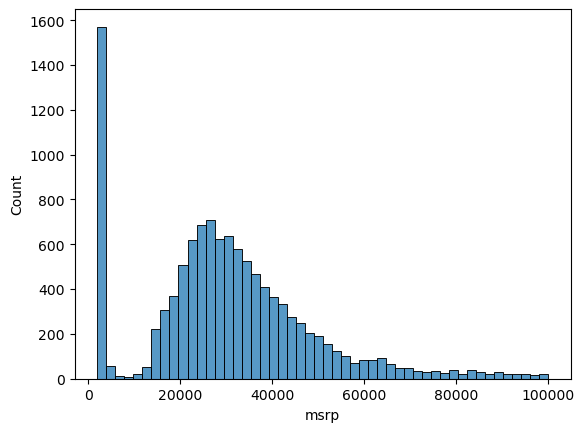

In [110]:
# Distribution of price
sns.histplot(df.msrp[df.msrp < 100000], bins=50)
plt.show()

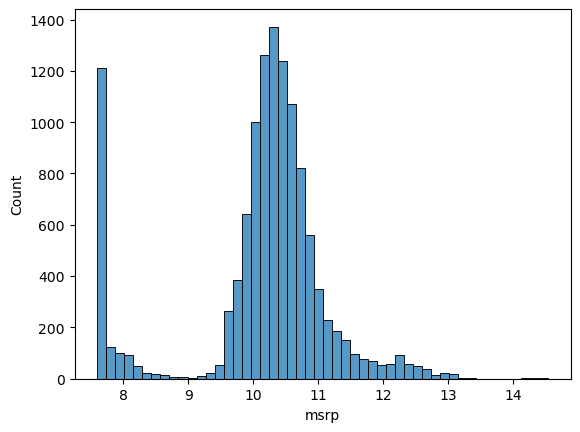

In [111]:
# Log transformation of price
prices_log = np.log1p(df.msrp)
sns.histplot(prices_log, bins=50)
plt.show()

In [112]:
# Check for missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Split Data for Validation

In [113]:
n = len(df)
n_val = n_test = int(0.2 * n)
n_train = n - n_val - n_test

print('n =', n)
print('n_train =', n_train)
print('n_val =', n_val)
print('n_test =', n_test)

n = 11914
n_train = 7150
n_val = 2382
n_test = 2382


In [114]:
# Shuffle the data
df = df.sample(frac=1, random_state=1).reset_index(drop=True)
df


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,lotus,evora_400,2017,premium_unleaded_(required),400.0,6.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,39,21,613,91900
1,aston_martin,v8_vantage,2014,premium_unleaded_(required),420.0,8.0,automated_manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,21,14,259,136900
2,hyundai,genesis,2015,regular_unleaded,311.0,6.0,automatic,rear_wheel_drive,4.0,"luxury,performance",large,sedan,29,18,1439,38000
3,suzuki,samurai,1993,regular_unleaded,66.0,4.0,manual,four_wheel_drive,2.0,NaN,compact,convertible_suv,26,24,481,2000
4,mitsubishi,outlander,2015,regular_unleaded,166.0,4.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,29,24,436,26195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,audi,q5,2016,premium_unleaded_(required),272.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,26,18,3105,53500
11910,toyota,tundra,2015,regular_unleaded,381.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,crew_cab_pickup,17,13,2031,47975
11911,saab,900,1997,regular_unleaded,150.0,4.0,manual,front_wheel_drive,4.0,"hatchback,luxury",compact,4dr_hatchback,26,18,376,2000
11912,pontiac,g6,2009,regular_unleaded,164.0,4.0,automatic,front_wheel_drive,2.0,NaN,midsize,coupe,33,22,210,22220


In [121]:
# Split Data for Validation
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val + n_test]
df_train = df.iloc[n_val + n_test:]

In [122]:
display(df_train.head())
display(df_val.head())
display(df_test.head())

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4764,toyota,tundra,2015,regular_unleaded,381.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,18,13,2031,44925
4765,dodge,shadow,1993,regular_unleaded,100.0,4.0,manual,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,29,22,1851,2000
4766,hyundai,elantra_gt,2016,regular_unleaded,173.0,4.0,manual,front_wheel_drive,4.0,"hatchback,performance",compact,4dr_hatchback,33,24,1439,18800
4767,mitsubishi,i-miev,2017,electric,66.0,NaN,direct_drive,rear_wheel_drive,4.0,hatchback,compact,4dr_hatchback,102,121,436,22995
4768,audi,rs_5,2014,premium_unleaded_(required),450.0,8.0,automated_manual,all_wheel_drive,2.0,"factory_tuner,luxury,high-performance",midsize,convertible,22,16,3105,77900


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,lotus,evora_400,2017,premium_unleaded_(required),400.0,6.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,39,21,613,91900
1,aston_martin,v8_vantage,2014,premium_unleaded_(required),420.0,8.0,automated_manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,convertible,21,14,259,136900
2,hyundai,genesis,2015,regular_unleaded,311.0,6.0,automatic,rear_wheel_drive,4.0,"luxury,performance",large,sedan,29,18,1439,38000
3,suzuki,samurai,1993,regular_unleaded,66.0,4.0,manual,four_wheel_drive,2.0,NaN,compact,convertible_suv,26,24,481,2000
4,mitsubishi,outlander,2015,regular_unleaded,166.0,4.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,29,24,436,26195


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2382,toyota,prius_c,2016,regular_unleaded,99.0,4.0,automatic,front_wheel_drive,4.0,"hatchback,hybrid",compact,4dr_hatchback,46,53,2031,20360
2383,mercedes-benz,clk-class,2007,premium_unleaded_(required),382.0,8.0,automatic,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,22,15,617,54900
2384,nissan,370z,2016,premium_unleaded_(required),332.0,6.0,manual,rear_wheel_drive,2.0,high-performance,compact,coupe,26,18,2009,29990
2385,gmc,sierra_1500,2017,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,24,18,549,32230
2386,porsche,911,2016,premium_unleaded_(required),350.0,6.0,manual,all_wheel_drive,2.0,"luxury,high-performance",compact,convertible,26,19,1715,102930


In [123]:
# Target variable
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [125]:
display(y_train)
display(y_val)
display(y_test)

array([10.71277197,  7.60140233,  9.84166534, ...,  7.60140233,
       10.00879307, 10.38331774])

array([11.42846719, 11.82701332, 10.54536775, ..., 12.12378283,
       10.47166657, 12.99816204])

array([ 9.92137659, 10.91328684, 10.30865262, ..., 10.65067301,
       10.7320612 , 10.65610575])